In [9]:
import pandas as pd 
import numpy as np
data = pd.read_csv('skroutz_cameras.csv')
data.head()

,382616,nikon d3400 kit black af p 18 55 vr,4835,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR),2055,DSLR Cameras
0,382617,nikon d3400 black kit af p 18 55mm vr doro thiki,552,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR),2055,DSLR Cameras
1,382618,nikon d3400 black 18 55af pvr me doro thiki me...,1308,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR),2055,DSLR Cameras
2,382619,nikon d3400 black kit 18 55mm af p vr doro thi...,403,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR),2055,DSLR Cameras
3,382620,nikon d3400 black kit 18 55mm vr af p ke thiki...,122,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR),2055,DSLR Cameras
4,382621,nikon d3400 kit af p dx 18 55mm f/3.5 5.6g vr ...,1122,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR),2055,DSLR Cameras


In [10]:
data = data.drop(['382616', 'DSLR Cameras', '2055'],1 )
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,nikon d3400 kit black af p 18 55 vr,4835,105085,Nikon D3400 Kit (AF-P DX 18-55mm f/3.5-5.6G VR)
0,1782,26,0,255
1,1763,59,0,255
2,1776,15,0,255
3,1780,4,0,255
4,1834,49,0,255


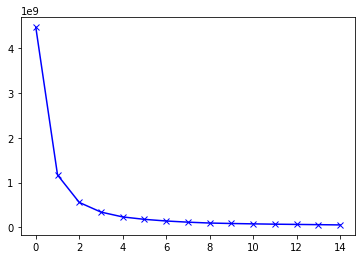

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()


In [13]:
means = KMeans(3)
Y_kmeans = kmeans.fit_predict(data)


from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

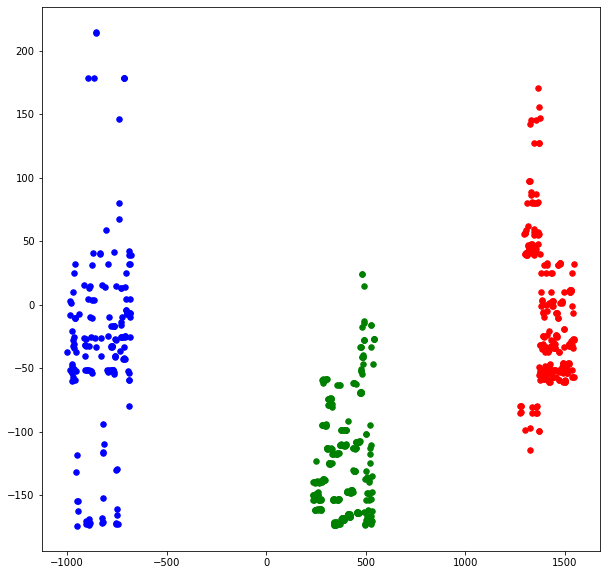

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='green', label='Cluster 3')
plt.show()